In [1]:
import pandas as pd

from data import get_factor_data
from corr_mds import *

Collect data

In [2]:
factor_data = get_factor_data()
factor_master = pd.DataFrame(factor_data.asset.attrs).T
factor_data


[*********************100%%**********************]  52 of 53 completed

1 Failed download:
['IEI']: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=10)"))
[*********************100%%**********************]  52 of 53 completed

<xarray.Dataset> Size: 2GB
Dimensions:     (date: 15177, ohlcv_type: 6, asset: 52, vol_type: 5,
                 asset_1: 52, corr_type: 5)
Coordinates:
  * date        (date) datetime64[ns] 121kB 1965-01-05 1965-01-06 ... 2024-11-08
  * ohlcv_type  (ohlcv_type) object 48B 'adj close' 'close' ... 'open' 'volume'
  * asset       (asset) object 416B 'SPY' 'IWM' 'MDY' ... 'UUP' 'FXE' 'FXY'
  * vol_type    (vol_type) int64 40B 21 63 126 252 512
  * asset_1     (asset_1) object 416B 'SPY' 'IWM' 'MDY' ... 'UUP' 'FXE' 'FXY'
  * corr_type   (corr_type) int64 40B 21 63 126 252 512
Data variables:
    ohlcv       (date, ohlcv_type, asset) float64 38MB nan nan ... 9.842e+04
    cret        (date, asset) float64 6MB nan nan nan nan ... 29.52 98.88 60.55
    ret         (date, asset) float64 6MB nan nan nan ... -0.008026 0.001654
    vol         (vol_type, date, asset) float64 32MB nan nan nan ... 7.444 9.994
    corr        (corr_type, date, asset, asset_1) float64 2GB nan nan ... 1.0

Project factor correlation matrix onto two dimensions, using different linear transformations to align the data.

In [3]:
transformation_type = {None:        'no transformation', 
                       'rotate':    'SPX rotated to x-axis', 
                       'normalize': 'SPX transformed to (1, 0)'
                       }
        
for transformation in transformation_type.keys():
    mds_ts = (mds_ts_df(factor_data.corr, transformation=transformation, start_date='2024')
              .reset_index()
              .join(factor_master, on='asset')
              .assign(date = lambda df: df['date'].astype(str)))
    fig = (draw_mds_ts(mds_ts, tick_range=None)
           .update_layout(title=f'Correlation Projection ({transformation_type[transformation]})'))
    fig.show()
    fig.write_html(R'G:\My Drive\risk\correlation.html')


Instead of animation, here we use whiskers.

1.5


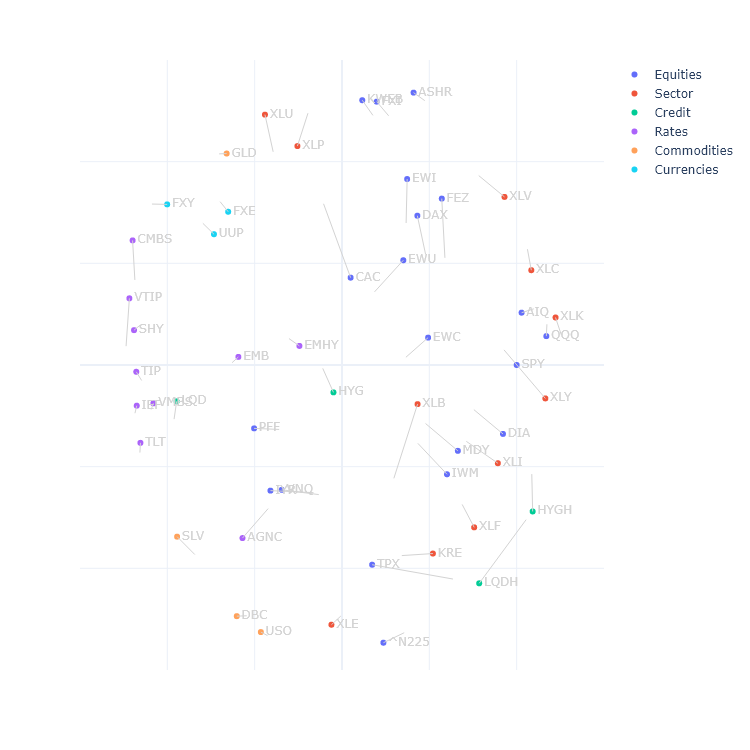

In [9]:
t0 = '2024-11-08'
t1 = '2024-08-08'

mds_ts = (mds_ts_df(factor_data.corr, transformation='normalize', start_date='2024')
            .reset_index()
            .join(factor_master, on='asset')
            .assign(date = lambda df: df['date'].astype(str)))
mds_latest = mds_ts[mds_ts['date'] == t0].drop(columns='date')
fig = draw_mds_ts(mds_latest, tick_range=1.5)
fig = add_whiskers(fig, mds_ts, t0, t1)
fig.update_layout(legend_title_text=None)

fig.show(renderer='png')


In [ ]:
date_max = mds_ts['date'].max()
mds_latest = mds_ts[mds_ts['date'] == date_max].drop(columns=['date'])
fig = draw_mds_ts(mds_latest, tick_range=1.5)
fig.show(renderer='png')
